# Q. Decision Tree
### Problem Statement:
* A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
* Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv("Company_Data.csv")

In [4]:
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
le= LabelEncoder()
data["ShelveLoc"]=le.fit_transform(data["ShelveLoc"])
data["Urban"]=le.fit_transform(data["Urban"])
data["US"]=le.fit_transform(data["US"])

In [7]:
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [8]:
data["Segment"]="<=7.496325"
data.loc[data["Sales"]>=7.496325,"Segment"]="HIGH"
data.loc[data["Sales"]<=7.496325,"Segment"]="LOW"

In [9]:
data["Segment"]=le.fit_transform(data["Segment"])
le= LabelEncoder()

In [10]:
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Segment
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [11]:
x=data.iloc[:,1:11]
y=data.iloc[:,-1]

In [12]:
scaler=StandardScaler()

In [13]:
D = scaler.fit_transform(data)

In [14]:
D

array([[ 0.71037626,  0.85045499,  0.15536099, ...,  0.64686916,
         0.74188112, -1.00501256],
       [ 1.32017934, -0.91248434, -0.73906037, ...,  0.64686916,
         0.74188112, -1.00501256],
       [ 0.9089168 , -0.78189624, -1.20415947, ...,  0.64686916,
         0.74188112, -1.00501256],
       ...,
       [-0.03060538,  2.41751217, -1.52615116, ...,  0.64686916,
         0.74188112,  0.99501244],
       [-0.55177428, -1.63071888,  0.37002211, ...,  0.64686916,
         0.74188112,  0.99501244],
       [ 0.78482897,  0.58927879, -1.13260576, ...,  0.64686916,
         0.74188112, -1.00501256]])

In [15]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.20, random_state=10)

In [16]:
CLF= DecisionTreeClassifier()

In [17]:
CLF.fit(X_train, Y_train)

DecisionTreeClassifier()

In [18]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge

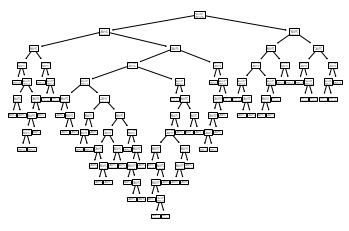

In [19]:
tree.plot_tree(CLF);

In [20]:
y_pred= CLF.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [21]:
accuracy_score(Y_test, y_pred)

0.6125

In [22]:
path = CLF.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [23]:
model = []
for ccp_alpha in ccp_alphas:
    CLF = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    CLF.fit(X_train, Y_train)
    model.append(CLF)
print ("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(model[-1].tree_.node_count, ccp_alphas[-1]))    

Number of nodes in the last tree is: 1 with ccp_alpha: 0.060235601600241495


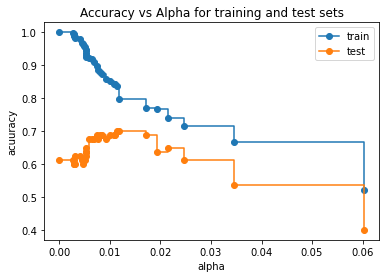

In [24]:
train_scores =[CLF.score(X_train, Y_train) for CLF in model]
test_scores = [CLF.score(X_test, Y_test) for CLF in model]

fig, ax= plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("acuuracy")
ax.set_title("Accuracy vs Alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker='o', label= "train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label= "test", drawstyle="steps-post")
ax.legend()
plt.show()

In [25]:
CLF2 = DecisionTreeClassifier(criterion='gini', random_state=10, ccp_alpha=0.017,)
CLF2.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.017, random_state=10)

In [26]:
pred1= CLF2.predict(X_test)
accuracy_score(Y_test, pred1)

0.7

In [27]:
param_dist= { 
    "criterion":["gini", "entropy"],
    "splitter":["best"],
    "max_depth":[1,2,3,4,5,None],
    "max_features":[1,2,3,4,5,6,7,8,9,10,11,None],
    "min_samples_split":[2],
    "min_samples_leaf":[1],
    "min_weight_fraction_leaf":[0.0],
    "max_features":[None],
    "random_state":[None],
    "max_leaf_nodes":[None],
    "min_impurity_decrease":[0.0],
    "min_impurity_split":[None],
    "class_weight":[None],
    "ccp_alpha":[0.01615]
}

In [28]:
grid = GridSearchCV(CLF2, param_grid=param_dist, n_jobs=4,)

In [29]:
grid.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.017, random_state=10),
             n_jobs=4,
             param_grid={'ccp_alpha': [0.01615], 'class_weight': [None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_impurity_split': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'random_state': [None], 'splitter': ['best']})

In [30]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01615, criterion='entropy')

In [31]:
grid.best_params_

{'ccp_alpha': 0.01615,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
grid.best_score_

0.73125

In [33]:
grid2 = RandomizedSearchCV(CLF2, param_distributions=param_dist, n_jobs=4,)

In [34]:
grid2.fit(X_train, Y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.017,
                                                    random_state=10),
                   n_jobs=4,
                   param_distributions={'ccp_alpha': [0.01615],
                                        'class_weight': [None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, None],
                                        'max_features': [None],
                                        'max_leaf_nodes': [None],
                                        'min_impurity_decrease': [0.0],
                                        'min_impurity_split': [None],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'min_weight_fraction_leaf': [0.0],
                                        'random_state': [None],
            

In [35]:
grid.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.017, random_state=10),
             n_jobs=4,
             param_grid={'ccp_alpha': [0.01615], 'class_weight': [None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_impurity_split': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'random_state': [None], 'splitter': ['best']})

In [36]:
grid2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01615, criterion='entropy')

In [37]:
grid2.best_score_

0.725

In [38]:
grid2.best_params_

{'splitter': 'best',
 'random_state': None,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_split': None,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'entropy',
 'class_weight': None,
 'ccp_alpha': 0.01615}

In [39]:
CLF2 = DecisionTreeClassifier(criterion='entropy', random_state=10, ccp_alpha=0.017,)
CLF2.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.017, criterion='entropy', random_state=10)

In [40]:
pred1= CLF2.predict(X_test)
accuracy_score(Y_test, pred1)

0.7375

In [41]:
print ("R2 score",r2_score(Y_test,pred1))
print ("RSME",np.sqrt(mean_squared_error(Y_test,pred1)))

R2 score -0.09374999999999978
RSME 0.51234753829798


In [42]:
R = Ridge(alpha=0.016, random_state=10)

In [43]:
R.fit(X_train, Y_train)

Ridge(alpha=0.016, random_state=10)

In [44]:
F_pred=R.predict(X_test)

In [45]:
print ("R2 score",r2_score(Y_test,F_pred))
print ("RSME",np.sqrt(mean_squared_error(Y_test,F_pred)))

R2 score 0.227447340957196
RSME 0.4305956782995772
